# Exercício de preprocessamento de imagens - Marco Aurélio Garcia

O presente notebook tem o objetivo de resolver o desafio final do curso de Machine Learning - Preprocessamento de Imagens. 
A solução utiliza exemplos das imagens de gatos e cachorros coletada após a realização do primeiro desafio (Transfer Learning). Inicialmente as imagens são obtidas, convertidas para escala de cinza e desta para escala preto e branco. 
A conversão para escala de cinza apresenta três alternativas para processamento enquanto que a conversão para preto e branco utiliza uma única alternativa que toma a imagem em escala de cinza e analisa o se o tom pixel a pixel é mais escuro ou mais claro (0 representando preto a 255 representando branco) fixando então os novos valores do pixel para 0 ou 1.

Abaixo listo algumas referências utilizadas como pesquisa para este trabalho:

https://www.dio.me/articles/reducao-de-dimensionalidade-em-imagens-usando-python

https://www.tensorflow.org/api_docs/python/tf/keras/utils

https://saturncloud.io/blog/how-to-convert-an-image-to-grayscale-using-numpy-arrays-a-comprehensive-guide/

https://www.brandonrohrer.com/convert_rgb_to_grayscale



In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img 
from keras.preprocessing import image

In [3]:
#### Caso as imagens não estejam disponíveis é só retirar os comentários abaixo e executar a célula.


# !echo "Realizando o download do dataset Cats & Dogs"
# !curl -L -o kagglecatsanddogs_5340.zip --progress-bar https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
# !tar -xf kagglecatsanddogs_5340.zip
# # !rm kagglecatsanddogs_5340.zip  #Para excluir arquivos em ambiente Linux ou Jupyter Colab
# !del kagglecatsanddogs_5340.zip #Para excluir arquivos em ambiente Windows


In [2]:
def get_escala_cinza(imagem_original):
    
    # 1 - Converte a imagem para escala de cinza calculando a média dos valores de vermelho, verde e azul para cada pixel
    imagem_cinza = np.mean(np.asarray(imagem_original), axis=2) # Converte a imagem em um array para  daí calcular a média do valor presente em axis=2
    imagem_cinza = array_to_img(np.expand_dims(imagem_cinza, axis=-1)) # Converte o array que estava em 2d para 3d e converte novamente para imagem
    

    # Códigos alternativos para conversão da imagem em grayscale:

    # 2 - Conversão utilizando a função convert do objeto PIL.Image
    # imagem_cinza = imagem_original.convert('L') # Converte para grayscale

    # 3 - Há também uma conversão através de uma média ponderada dos valores de vermelho, verde e azul (RGB) valorizando o impacto do verde para percepção humana
    # escala de cinza = 0.299 * R + 0.587 * G + 0.114 * B , que seria = np.array([0.299, 0.587, 0.114])
    # imagem_cinza = np.dot(np.asarray(imagem_original), np.array([0.299, 0.587, 0.114])) # Multiplica o array da imagem original pelos pesos ponderados da conversão RGB
    # imagem_cinza = array_to_img(np.expand_dims(imagem_cinza, axis=-1))
       
    return imagem_cinza

In [3]:
def get_escala_pb(imagem_cinza):
    
    # 1 - A portir da imagem em escala de cinza, Identifica quais pixels tem valor maior que 128 e atribui o valor 1 para eles, para os outros o valor permanece 0
    imagem_pb = ((np.asarray(imagem_cinza)) > 128).astype(int) # Converte a imagem em array e verifica quais pixels tem valor maior que 128
    imagem_pb = array_to_img(np.expand_dims(imagem_pb, axis=-1)) # Converte o array que estava em 2d para 3d e converte novamente para imagem
    
       
    return imagem_pb

In [4]:
# Algumas imagens carregads por exemplo

root = '.\\PetImages'
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]

idx = [i for i in range(2)] +  [i for i in range(len(images)-2, len(images))] 

# Cria um pequeno array com 4 imagens para exemplo
imgs = [load_img(images[i], target_size=(224, 224)) for i in idx]

# Converte as 4 imagens para escala de cinza
imgs_cinza = [get_escala_cinza(imgs[i]) for i in range(len(imgs))]

# Converte as imagens para escala de P&B
imgs_pb = [get_escala_pb(imgs_cinza[i]) for i in range(len(imgs_cinza))]

concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
concat_image_cinza = np.concatenate([np.asarray(img) for img in imgs_cinza], axis=1)
concat_image_pb = np.concatenate([np.asarray(img) for img in imgs_pb], axis=1)

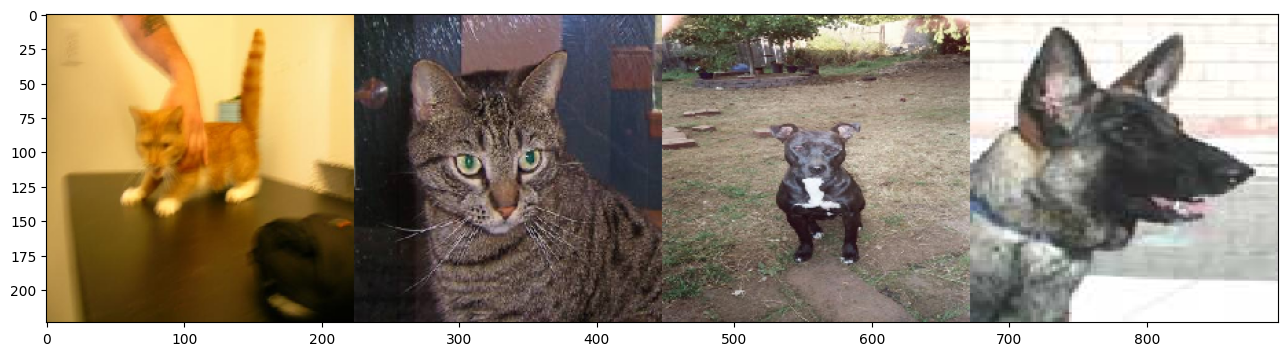

In [5]:
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

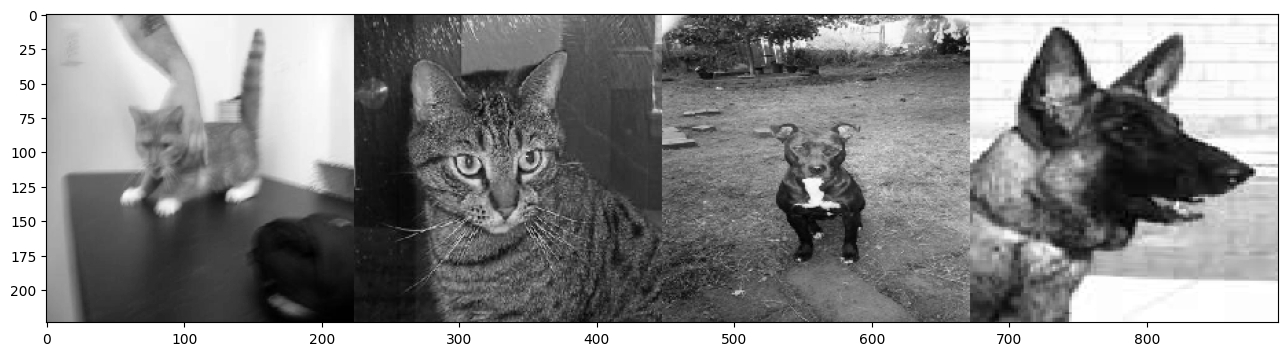

In [6]:
plt.figure(figsize=(16,4))
plt.imshow(concat_image_cinza, cmap='gray')

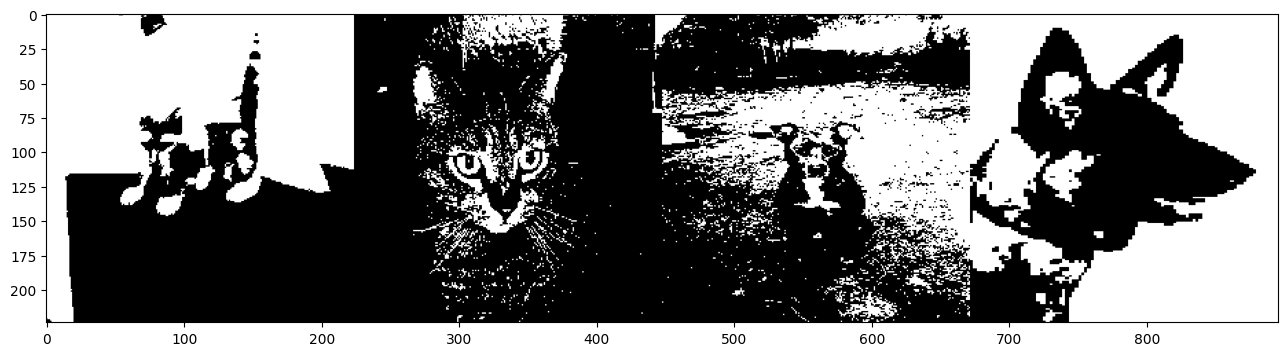

In [7]:
plt.figure(figsize=(16,4))
plt.imshow(concat_image_pb, cmap='gray')

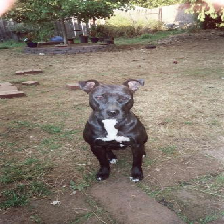

In [8]:
imgs[2]

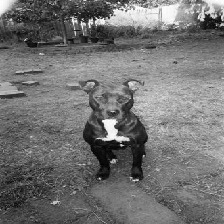

In [9]:
imgs_cinza[2]

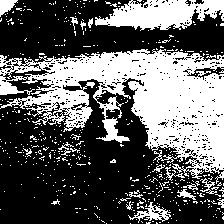

In [10]:
imgs_pb[2]

In [11]:
np.asarray(imgs[2]).shape

(224, 224, 3)

In [12]:
np.asarray(imgs_cinza[2]).shape

(224, 224)

In [13]:
np.asarray(imgs_pb[2]).shape

(224, 224)